In [1]:
from pennylane import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from pennylane import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pennylane as qml
import seaborn as sns
from sklearn.svm import SVC
import matplotlib as mpl
from abc import abstractmethod, ABC

import warnings
import time

import torch
from torchvision import datasets, transforms
from torch import manual_seed
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from utils import ova_random, ova_trained, get_scores

np.random.seed(100)

In [2]:
iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

X = np.pad(X, ((0,0),(0,2)))

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
X_train.shape, X_test.shape

((90, 6), (60, 6))

In [3]:
def feature_map(x, params, n_layers, n_wires):
    """The embedding ansatz"""

    steps = x.shape[0]//3
    qubits = list(range(n_wires))
    
    for q in qubits:
        qml.Hadamard(wires=q)
    
    for l in range(n_layers):
        for q in qubits:
            for i in range(steps):
                z = x[3*i:3*i+3]*params[l,q,0,3*i:3*i+3] + params[l,q,1,3*i:3*i+3]
                qml.RZ(z[0], wires=q)
                qml.RY(z[1], wires=q)
                qml.RZ(z[2], wires=q)
                
        if (l & 1):
            for q0, q1 in zip(qubits[1::2], qubits[2::2] + [qubits[0]]):
                qml.CZ((q0,q1))
        else:
            for q0, q1 in zip(qubits[0::2], qubits[1::2]):
                qml.CZ((q0,q1))

In [5]:
n_layers = [1,2,3,4]
n_wires = [1,2,3,4]

In [ ]:
svm_trained_dict = {
    'n_layers': [],
    'n_wires': [],
    'train_f1_score': [],
    'test_f1_score': [],
    'runtime': []
}

for l in n_layers:
    for q in n_wires:
        print(f"layer {l}, qubits {q}")
        
        start = time.time()
        params_shape = (l, q, 2, 6)
        
        svms_trained = ova_trained(X_train, y_train, X_test, y_test, feature_map, l, q, params_shape, 500)
        train_f1_score, test_f1_score = get_scores(svms_trained, X_train, y_train, X_test, y_test)
        end = time.time()
        
        svm_trained_dict['n_layers'].append(l)
        svm_trained_dict['n_wires'].append(q)
        svm_trained_dict['train_f1_score'].append(train_f1_score)
        svm_trained_dict['test_f1_score'].append(test_f1_score)
        svm_trained_dict['runtime'].append(end-start)
        
        pd.DataFrame(svm_trained_dict).to_csv('ova_trained.csv')

layer 1, qubits 1
class 0
Step 50 - Alignment = 0.438
Step 100 - Alignment = 0.464
Step 150 - Alignment = 0.491
Step 200 - Alignment = 0.483
Step 250 - Alignment = 0.502
Step 300 - Alignment = 0.514
Step 350 - Alignment = 0.495
Step 400 - Alignment = 0.519
Step 450 - Alignment = 0.520
Step 500 - Alignment = 0.519
The accuracy of the kernel for class 0 with trained parameters is 1.000
The accuracy of the kernel for class 0 with trained parameters is 1.000
class 1
Step 50 - Alignment = 0.407
Step 100 - Alignment = 0.428
Step 150 - Alignment = 0.410
Step 200 - Alignment = 0.428
Step 250 - Alignment = 0.426
Step 300 - Alignment = 0.429
Step 350 - Alignment = 0.431
Step 400 - Alignment = 0.430
Step 450 - Alignment = 0.431
Step 500 - Alignment = 0.432
The accuracy of the kernel for class 1 with trained parameters is 0.956
The accuracy of the kernel for class 1 with trained parameters is 0.950
class 2
Step 50 - Alignment = 0.145
Step 100 - Alignment = 0.177
Step 150 - Alignment = 0.182
Step 2

The accuracy of the kernel for class 2 with trained parameters is 0.950
F1 score on train set: 0.967
F1 score on test set: 0.967
layer 2, qubits 3
class 0
Step 50 - Alignment = 0.602
Step 100 - Alignment = 0.601
Step 150 - Alignment = 0.600
Step 200 - Alignment = 0.611
Step 250 - Alignment = 0.633
Step 300 - Alignment = 0.602
Step 350 - Alignment = 0.612
Step 400 - Alignment = 0.606
Step 450 - Alignment = 0.592
Step 500 - Alignment = 0.603
The accuracy of the kernel for class 0 with trained parameters is 1.000
The accuracy of the kernel for class 0 with trained parameters is 1.000
class 1
Step 50 - Alignment = 0.467
Step 100 - Alignment = 0.440
Step 150 - Alignment = 0.506
Step 200 - Alignment = 0.494
Step 250 - Alignment = 0.490
Step 300 - Alignment = 0.498
Step 350 - Alignment = 0.521
Step 400 - Alignment = 0.498
Step 450 - Alignment = 0.526
Step 500 - Alignment = 0.466
The accuracy of the kernel for class 1 with trained parameters is 0.978
The accuracy of the kernel for class 1 with

In [4]:
svm_trained_dict = {
    'n_layers': [],
    'n_wires': [],
    'train_f1_score': [],
    'test_f1_score': [],
    'runtime': []
}


print(f"layer {2}, qubits {4}")

start = time.time()
params_shape = (2, 4, 2, 6)

svms_trained = ova_trained(X_train, y_train, X_test, y_test, feature_map, 2, 4, params_shape, 500)
train_f1_score, test_f1_score = get_scores(svms_trained, X_train, y_train, X_test, y_test)
end = time.time()

svm_trained_dict['n_layers'].append(2)
svm_trained_dict['n_wires'].append(4)
svm_trained_dict['train_f1_score'].append(train_f1_score)
svm_trained_dict['test_f1_score'].append(test_f1_score)
svm_trained_dict['runtime'].append(end-start)

pd.DataFrame(svm_trained_dict).to_csv('ova_trained.csv')

layer 2, qubits 4
class 0
Step 50 - Alignment = 0.552
Step 100 - Alignment = 0.603
Step 150 - Alignment = 0.596
Step 200 - Alignment = 0.593
Step 250 - Alignment = 0.607
Step 300 - Alignment = 0.596
Step 350 - Alignment = 0.614
Step 400 - Alignment = 0.624
Step 450 - Alignment = 0.607
Step 500 - Alignment = 0.608
The accuracy of the kernel for class 0 with trained parameters is 1.000
The accuracy of the kernel for class 0 with trained parameters is 1.000
class 1
Step 50 - Alignment = 0.455
Step 100 - Alignment = 0.440
Step 150 - Alignment = 0.435
Step 200 - Alignment = 0.426
Step 250 - Alignment = 0.443
Step 300 - Alignment = 0.483
Step 350 - Alignment = 0.449
Step 400 - Alignment = 0.454
Step 450 - Alignment = 0.467
Step 500 - Alignment = 0.459
The accuracy of the kernel for class 1 with trained parameters is 0.978
The accuracy of the kernel for class 1 with trained parameters is 0.967
class 2
Step 50 - Alignment = 0.354
Step 100 - Alignment = 0.413
Step 150 - Alignment = 0.379
Step 2

In [5]:
df = pd.read_csv('ova_trained.csv')
df

,Unnamed: 0,n_layers,n_wires,train_f1_score,test_f1_score,runtime
0,0,1,1,0.977778,0.933333,622.787196
1,1,1,2,0.966667,0.983333,1684.490925
2,2,1,3,0.977778,0.950000,3348.054474
3,3,1,4,0.966667,0.983333,5714.932501
4,4,2,1,0.966667,0.950000,1768.352160
5,5,2,2,0.966667,0.966667,5270.491913
6,6,2,3,0.966667,0.966667,9916.155164
7,7,2,4,0.977778,0.966667,16692.833640


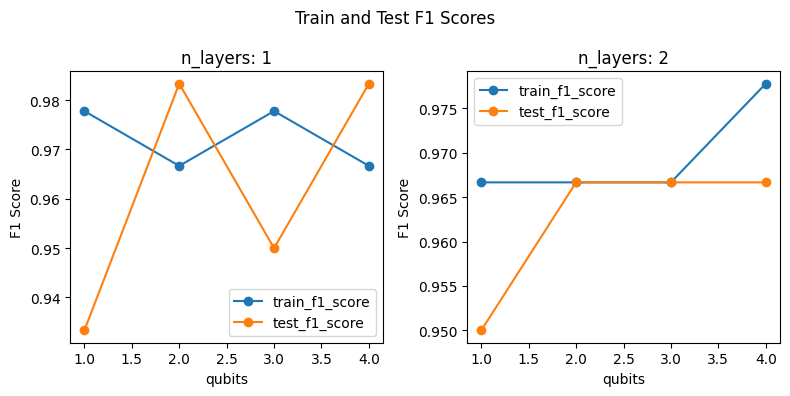

In [15]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8, 4)

for i in range(2):
    n_l = i+1
    df[df['n_layers'] == n_l].plot(kind = 'line', 
                                 x = 'n_wires', 
                                 y = 'train_f1_score', 
                                 marker = 'o', 
                                 ax = axs[i])
    df[df['n_layers'] == n_l].plot(kind = 'line', 
                                 x = 'n_wires', 
                                 y = 'test_f1_score', 
                                 marker = 'o', 
                                 ax = axs[i])
    axs[i].set_title(f"n_layers: {n_l}")

for ax in axs.flat:
    ax.set(xlabel='qubits', ylabel='F1 Score')
#     ax.label_outer()
    
fig.suptitle('Train and Test F1 Scores')
fig.tight_layout()

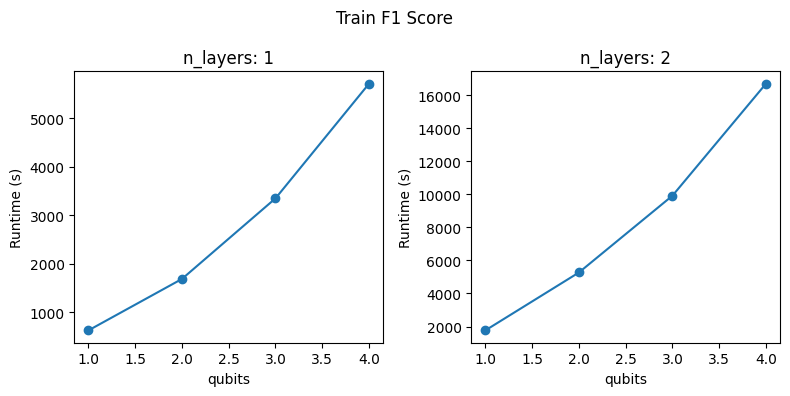

In [16]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(8, 4)

for i in range(2):
    n_l = i + 1
    df[df['n_layers'] == n_l].plot(kind = 'line', 
                                 x = 'n_wires', 
                                 y = 'runtime', 
                                 marker = 'o', 
                                 ax = axs[i])
    axs[i].get_legend().remove()
    axs[i].set_title(f"n_layers: {n_l}")

for ax in axs.flat:
    ax.set(xlabel='qubits', ylabel='Runtime (s)')
#     ax.label_outer()

fig.suptitle('Train F1 Score')
fig.tight_layout()